<a href="https://colab.research.google.com/github/PawarTEJA/Mall-customers/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/My Drive/clustering/Mall_Customers.csv')

In [7]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
X = df.iloc[:,[3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [23]:
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [13]:
import matplotlib.pyplot as plt

In [24]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


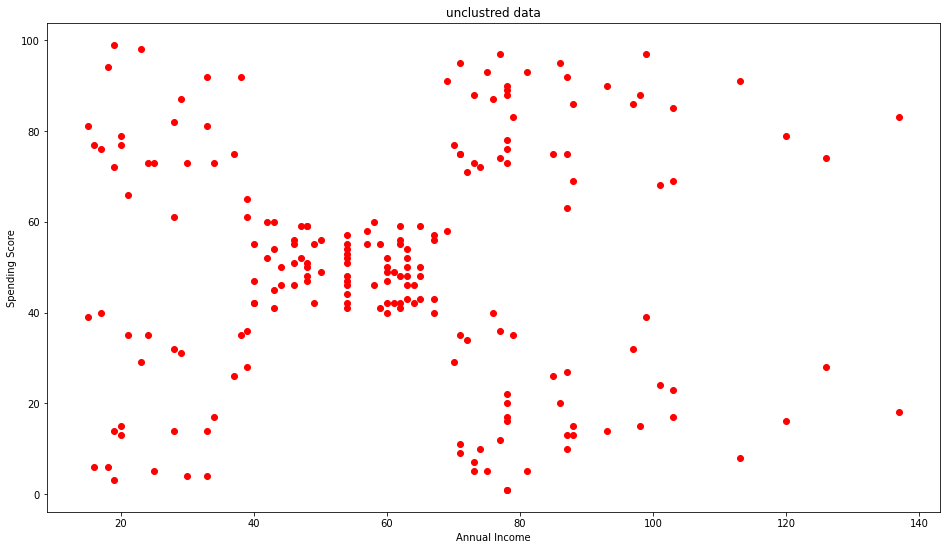

In [25]:
plt.figure(figsize = (16,9))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('unclustred data')
plt.scatter(X.iloc[:,0],X.iloc[:,1], color = 'r')

In [26]:
from sklearn.cluster import KMeans

In [28]:
km = KMeans(n_clusters = 3)

In [30]:
labels = km.fit_predict(X)

In [31]:
km.inertia_

106348.37306211122

In [32]:
#to calculate k i.e. number of clusters

In [34]:
SSE = []
for k in range(1,16):
  km = KMeans(n_clusters=k)
  labels = km.fit_predict(X)
  SSE.append(km.inertia_)

In [35]:
SSE

[269981.28,
 183257.86154461786,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30227.606513152008,
 25062.433792653777,
 21794.8856090982,
 19721.547527312738,
 17636.649972700317,
 15810.343426539726,
 14639.704221047763,
 13124.415449975557,
 11718.686082776872]

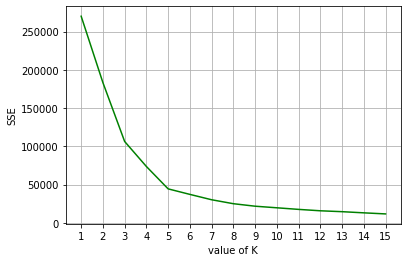

In [37]:
plt.xlabel('value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), SSE, color = 'green')

at k = 5 elbow effect is seen hence number of clusters are 5


In [40]:
#silhouette method

In [41]:
from sklearn.metrics import silhouette_score

In [44]:
silh = []
for k in range(2, 16):
  km = KMeans(n_clusters=k)
  labels = km.fit_predict(X)
  score = silhouette_score(X, labels)
  silh.append(score)

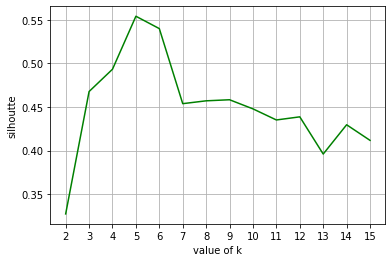

In [45]:
plt.xlabel('value of k')
plt.ylabel('silhoutte')
plt.grid()
plt.xticks(range(2,16))
plt.plot(range(2,16), silh, color = 'green')

at k = 5 highest silhouette score


In [46]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X)
labels

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [47]:
center = km.cluster_centers_

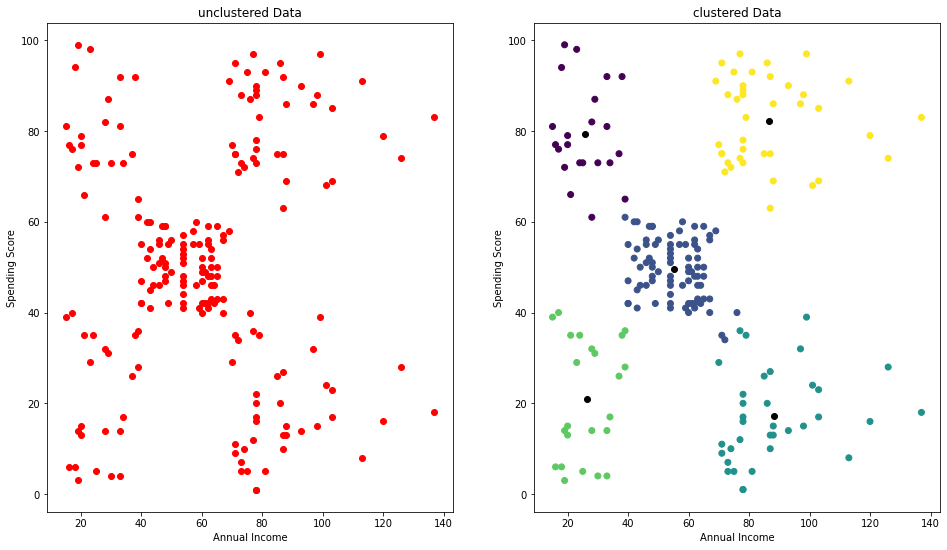

In [52]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('unclustered Data')
plt.scatter(X.iloc[:,0], X.iloc[:,1], color = 'r')

plt.subplot(1,2,2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('clustered Data')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = labels)
plt.scatter(center[:,0], center[:,1], color = 'k')

In [54]:
df[labels==1]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [55]:
df[labels == 2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
128,129,Male,59,71,11
130,131,Male,47,71,9
134,135,Male,20,73,5
136,137,Female,44,73,7
138,139,Male,19,74,10
140,141,Female,57,75,5
144,145,Male,25,77,12
146,147,Male,48,77,36
148,149,Female,34,78,22


In [56]:
df[labels==3]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
2,3,Female,20,16,6
4,5,Female,31,17,40
6,7,Female,35,18,6
8,9,Male,64,19,3
10,11,Male,67,19,14
12,13,Female,58,20,15
14,15,Male,37,20,13
16,17,Female,35,21,35
18,19,Male,52,23,29


In [57]:
df[labels == 4]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
123,124,Male,39,69,91
125,126,Female,31,70,77
127,128,Male,40,71,95
129,130,Male,38,71,75
131,132,Male,39,71,75
133,134,Female,31,72,71
135,136,Female,29,73,88
137,138,Male,32,73,73
139,140,Female,35,74,72
141,142,Male,32,75,93


In [58]:
df[labels==5]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [60]:
len(df[labels==0])

22

In [61]:
df[labels==0]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [62]:
one = df[labels==0]

In [64]:
one.to_csv('first_group.csv', index = False)

In [65]:
two = df[labels==1]
two.to_csv('second_group.csv', index = False)

In [68]:
three = df[labels==2]
three.to_csv('third_group.csv', index = False)

In [69]:
four = df[labels==3]
four.to_csv('fourth_group.csv', index = False)

In [70]:
five = df[labels==4]
five.to_csv('fifth_group.csv', index = False)

DENDROGRAM

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage

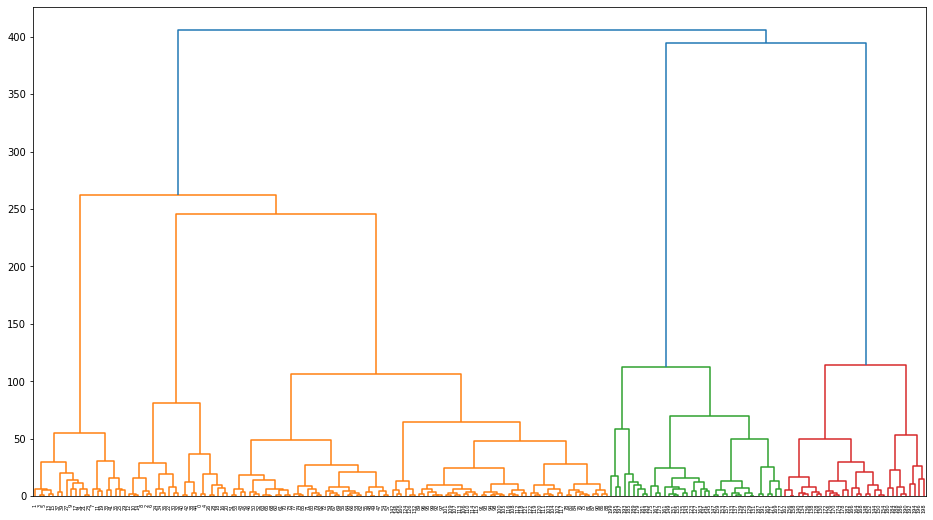

In [73]:
plt.figure(figsize = (16, 9))
dendrogram(linkage(X, method ='ward'))
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
agl = AgglomerativeClustering(n_clusters = 5)

In [76]:
hlabels = agl.fit_predict(X)
hlabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

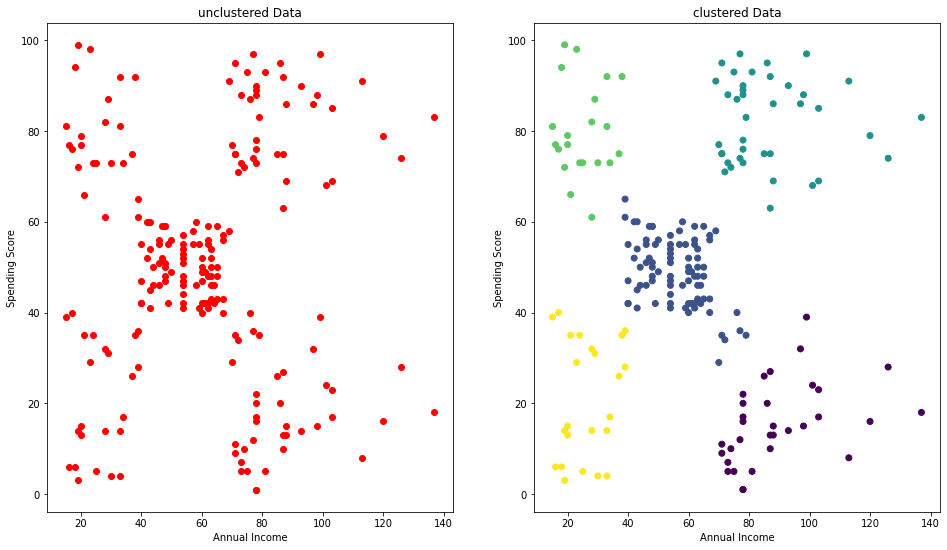

In [77]:
plt.figure(figsize = (16,9))
plt.subplot(1,2,1)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('unclustered Data')
plt.scatter(X.iloc[:,0], X.iloc[:,1], color = 'r')

plt.subplot(1,2,2)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('clustered Data')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = hlabels)